In [1]:
import os
import random
import shutil
from glob import glob

# >>> USTAW SWOJĄ ŚCIEŻKĘ <<<
dataset_path = r"C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_ELBOW_classification"

# Ustawienia
seed = 42
test_fraction = 0.30       # jaka część z VAL idzie do TEST
source_split = "val"       # z czego tworzymy TEST: "val" (zalecane) lub "train"
move_files = True          # True = przenieś (bez duplikatów); False = kopiuj

random.seed(seed)

# Struktura
splits = ["train", "val", "test"]
classes = ["positive", "negative"]
for split in splits:
    for cls in classes:
        os.makedirs(os.path.join(dataset_path, split, cls), exist_ok=True)

def pick_files(dirpath):
    exts = ("*.jpg", "*.jpeg", "*.png")
    files = []
    for e in exts:
        files.extend(glob(os.path.join(dirpath, e)))
    return files

moved_total = 0
report = []

for cls in classes:
    src_dir = os.path.join(dataset_path, source_split, cls)
    dst_dir = os.path.join(dataset_path, "test", cls)

    files = pick_files(src_dir)
    n_src = len(files)
    if n_src == 0:
        report.append(f"[{cls}] Brak plików w {src_dir} — pomijam.")
        continue

    n_take = max(1, int(round(n_src * test_fraction))) if n_src > 3 else 1
    sample = random.sample(files, n_take)

    for f in sample:
        if move_files:
            shutil.move(f, os.path.join(dst_dir, os.path.basename(f)))
        else:
            shutil.copy2(f, os.path.join(dst_dir, os.path.basename(f)))
    moved_total += len(sample)

    # Podsumowanie
    n_src_after = len(pick_files(src_dir))
    n_test_now = len(pick_files(dst_dir))
    report.append(
        f"[{cls}] przeniesiono {len(sample)} z {n_src} → "
        f"{source_split} zostało {n_src_after}, test ma teraz {n_test_now}"
    )

print("\n=== PODSUMOWANIE ===")
for line in report:
    print(line)
print(f"\n✓ Razem przeniesionych do TEST: {moved_total}")

print("\nŚcieżki:")
print(f"train: {os.path.join(dataset_path, 'train')}")
print(f"val  : {os.path.join(dataset_path, 'val')}")
print(f"test : {os.path.join(dataset_path, 'test')}")




=== PODSUMOWANIE ===
[positive] przeniesiono 30 z 100 → val zostało 70, test ma teraz 30
[negative] przeniesiono 30 z 100 → val zostało 70, test ma teraz 30

✓ Razem przeniesionych do TEST: 60

Ścieżki:
train: C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_ELBOW_classification\train
val  : C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_ELBOW_classification\val
test : C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_ELBOW_classification\test


🔹 Device: cuda
📂 Dataset path: C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_ELBOW_classification
🏷️ Klasy: ['negative', 'positive']
train: 4613 obrazów
  val: 140 obrazów
 test: 60 obrazów
train distribution: Counter({0: 2764, 1: 1849})
val distribution: Counter({0: 70, 1: 70})
test distribution: Counter({0: 30, 1: 30})
───────────────────────────────
⚖️ Wagi klas: [1.668958067893982, 2.4948620796203613]

🔹 Epoch 1/25


Train:   0%|          | 0/289 [00:00<?, ?it/s]C:\Users\Weronika\AppData\Local\Temp\ipykernel_19460\1939988650.py:158: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\Scalar.cpp:23.)
  run_loss += loss.item() * inputs.size(0)


✅ Train: acc=0.751, loss=0.545 | Val: acc=0.764, loss=0.499 | Test: acc=0.800, loss=0.413

🔹 Epoch 2/25


✅ Train: acc=0.804, loss=0.459 | Val: acc=0.821, loss=0.462 | Test: acc=0.833, loss=0.412

🔹 Epoch 3/25


✅ Train: acc=0.830, loss=0.408 | Val: acc=0.736, loss=0.507 | Test: acc=0.850, loss=0.452

🔹 Epoch 4/25


✅ Train: acc=0.844, loss=0.378 | Val: acc=0.829, loss=0.445 | Test: acc=0.867, loss=0.353

🔹 Epoch 5/25


✅ Train: acc=0.858, loss=0.361 | Val: acc=0.786, loss=0.472 | Test: acc=0.850, loss=0.351

🔹 Epoch 6/25


✅ Train: acc=0.896, loss=0.265 | Val: acc=0.793, loss=0.489 | Test: acc=0.867, loss=0.336

🔹 Epoch 7/25


✅ Train: acc=0.911, loss=0.229 | Val: acc=0.814, loss=0.523 | Test: acc=0.833, loss=0.346

🔹 Epoch 8/25


✅ Train: acc=0.919, loss=0.217 | Val: acc=0.807, loss=0.566 | Test: acc=0.900, loss=0.317

🔹 Epoch 9/25


✅ Train: acc=0.927, loss=0.195 | Val: acc=0.814, loss=0.555 | Test: acc=0.833, loss=0.384

🔹 Epoch 10/25


✅ Train: acc=0.929, loss=0.177 | Val: acc=0.786, loss=0.624 | Test: acc=0.833, loss=0.394

🔹 Epoch 11/25


✅ Train: acc=0.944, loss=0.155 | Val: acc=0.800, loss=0.627 | Test: acc=0.850, loss=0.367

🔹 Epoch 12/25


✅ Train: acc=0.946, loss=0.159 | Val: acc=0.807, loss=0.622 | Test: acc=0.850, loss=0.370

🔹 Epoch 13/25


✅ Train: acc=0.948, loss=0.153 | Val: acc=0.807, loss=0.629 | Test: acc=0.850, loss=0.375

🔹 Epoch 14/25


✅ Train: acc=0.946, loss=0.152 | Val: acc=0.800, loss=0.629 | Test: acc=0.850, loss=0.369

🔹 Epoch 15/25


✅ Train: acc=0.941, loss=0.155 | Val: acc=0.800, loss=0.638 | Test: acc=0.850, loss=0.375

🔹 Epoch 16/25


✅ Train: acc=0.947, loss=0.150 | Val: acc=0.800, loss=0.638 | Test: acc=0.850, loss=0.374

🔹 Epoch 17/25


✅ Train: acc=0.949, loss=0.146 | Val: acc=0.807, loss=0.639 | Test: acc=0.850, loss=0.373

🔹 Epoch 18/25


✅ Train: acc=0.947, loss=0.147 | Val: acc=0.800, loss=0.640 | Test: acc=0.850, loss=0.371

🔹 Epoch 19/25


✅ Train: acc=0.945, loss=0.150 | Val: acc=0.807, loss=0.640 | Test: acc=0.850, loss=0.372

🔹 Epoch 20/25


✅ Train: acc=0.945, loss=0.145 | Val: acc=0.800, loss=0.641 | Test: acc=0.850, loss=0.372

🔹 Epoch 21/25


✅ Train: acc=0.944, loss=0.156 | Val: acc=0.800, loss=0.641 | Test: acc=0.850, loss=0.372

🔹 Epoch 22/25


✅ Train: acc=0.946, loss=0.147 | Val: acc=0.800, loss=0.641 | Test: acc=0.850, loss=0.372

🔹 Epoch 23/25


✅ Train: acc=0.947, loss=0.146 | Val: acc=0.800, loss=0.641 | Test: acc=0.850, loss=0.372

🔹 Epoch 24/25


✅ Train: acc=0.948, loss=0.144 | Val: acc=0.800, loss=0.641 | Test: acc=0.850, loss=0.372

🔹 Epoch 25/25


✅ Train: acc=0.943, loss=0.155 | Val: acc=0.800, loss=0.641 | Test: acc=0.850, loss=0.372


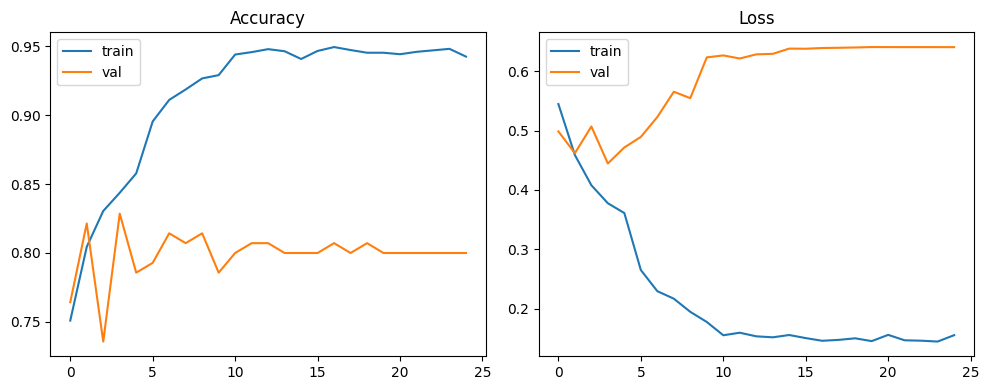

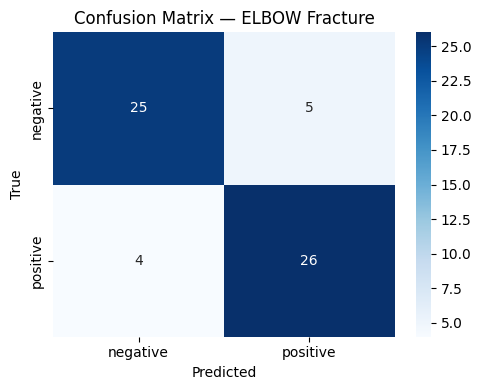


📋 Classification report:

              precision    recall  f1-score   support

    negative       0.86      0.83      0.85        30
    positive       0.84      0.87      0.85        30

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



In [2]:
import os
import random
from collections import Counter

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# -------------------------
# Konfiguracja
# -------------------------
base_root = r"C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman"
category  = "ELBOW"      # <-- TUTAJ zmieniasz: ELBOW / SHOULDER / HAND / FOREARM / FINGER
dataset_path = os.path.join(base_root, f"XR_{category}_classification")

image_size   = 224
batch_size   = 16
num_workers  = 2
epochs       = 25
lr           = 1e-4
seed         = 27

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("🔹 Device:", device)
print("📂 Dataset path:", dataset_path)

# -------------------------
# Seed
# -------------------------
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

# -------------------------
# Transformacje
# -------------------------
data_transforms = {
    "train": transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    "val": transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    "test": transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
}

# -------------------------
# Datasets i Dataloaders
# -------------------------
splits = ["train", "val", "test"]

image_datasets = {
    split: datasets.ImageFolder(os.path.join(dataset_path, split),
                                transform=data_transforms[split])
    for split in splits
}

dataloaders = {
    split: DataLoader(image_datasets[split],
                      batch_size=batch_size,
                      shuffle=(split == "train"),
                      num_workers=num_workers)
    for split in splits
}

class_names = image_datasets["train"].classes
print("🏷️ Klasy:", class_names)
for split in splits:
    print(f"{split:>5}: {len(image_datasets[split])} obrazów")

# -------------------------
# Rozkład klas (kontrola)
# -------------------------
for split in splits:
    cnt = Counter([label for _, label in image_datasets[split]])
    print(f"{split} distribution:", cnt)
print("───────────────────────────────")

# -------------------------
# Model VGG16 (transfer learning)
# -------------------------
model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)

# Zamrażamy cechy (możesz odblokować później dla lepszego wyniku)
for param in model.features[:20].parameters():   # zamroź tylko do ~połowy
    param.requires_grad = False


# Zmieniamy ostatnią warstwę klasyfikatora
in_features = model.classifier[-1].in_features
model.classifier[-1] = nn.Linear(in_features, len(class_names))
model = model.to(device)

# Wagi klas (opcjonalnie, przy lekkiej nierównowadze)
train_labels = [label for _, label in image_datasets["train"]]
counts = Counter(train_labels)
total = sum(counts.values())
class_weights = torch.tensor(
    [total / counts[i] for i in range(len(class_names))],
    dtype=torch.float32
).to(device)
print("⚖️ Wagi klas:", class_weights.tolist())

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.AdamW(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# -------------------------
# Pętle trening / walidacja / test
# -------------------------
history = {
    "train_acc": [], "train_loss": [],
    "val_acc":   [], "val_loss":   [],
    "test_acc":  [], "test_loss":  [],
}

for epoch in range(1, epochs + 1):
    print(f"\n🔹 Epoch {epoch}/{epochs}")

    # ---- TRAIN ----
    model.train()
    run_loss, correct, total = 0.0, 0, 0
    for inputs, labels in tqdm(dataloaders["train"], desc="Train", leave=False):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        run_loss += loss.item() * inputs.size(0)
        correct += torch.sum(preds == labels).item()
        total += labels.size(0)

    train_loss = run_loss / total
    train_acc = correct / total

    # ---- VAL ----
    model.eval()
    run_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in tqdm(dataloaders["val"], desc="Val", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            run_loss += loss.item() * inputs.size(0)
            correct += torch.sum(preds == labels).item()
            total += labels.size(0)

    val_loss = run_loss / total
    val_acc = correct / total

    # ---- TEST (monitoring w trakcie) ----
    run_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in tqdm(dataloaders["test"], desc="Test", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            run_loss += loss.item() * inputs.size(0)
            correct += torch.sum(preds == labels).item()
            total += labels.size(0)

    test_loss = run_loss / total
    test_acc = correct / total

    scheduler.step()

    history["train_acc"].append(train_acc)
    history["train_loss"].append(train_loss)
    history["val_acc"].append(val_acc)
    history["val_loss"].append(val_loss)
    history["test_acc"].append(test_acc)
    history["test_loss"].append(test_loss)

    print(f"✅ Train: acc={train_acc:.3f}, loss={train_loss:.3f} | "
          f"Val: acc={val_acc:.3f}, loss={val_loss:.3f} | "
          f"Test: acc={test_acc:.3f}, loss={test_loss:.3f}")

# -------------------------
# Wykresy
# -------------------------
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history["train_acc"], label="train")
plt.plot(history["val_acc"], label="val")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history["train_loss"], label="train")
plt.plot(history["val_loss"], label="val")
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------
# Końcowy TEST + Confusion Matrix
# -------------------------
y_true, y_pred = [], []
model.eval()
with torch.no_grad():
    for inputs, labels in dataloaders["test"]:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix — {category} Fracture")
plt.tight_layout()
plt.show()

print("\n📋 Classification report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


🔹 Device: cuda
📂 Dataset path: C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_SHOULDER_classification
🏷️ Klasy: ['negative', 'positive']
train: 7797 obrazów
  val: 140 obrazów
 test: 60 obrazów
train distribution: Counter({0: 4000, 1: 3797})
val distribution: Counter({0: 70, 1: 70})
test distribution: Counter({0: 30, 1: 30})
───────────────────────────────
⚖️ Wagi klas: [1.9492499828338623, 2.0534632205963135]

🔹 Epoch 1/25


✅ Train: acc=0.703, loss=0.582 | Val: acc=0.629, loss=0.675 | Test: acc=0.550, loss=0.724

🔹 Epoch 2/25


✅ Train: acc=0.772, loss=0.493 | Val: acc=0.629, loss=0.605 | Test: acc=0.650, loss=0.593

🔹 Epoch 3/25


✅ Train: acc=0.794, loss=0.459 | Val: acc=0.650, loss=0.716 | Test: acc=0.700, loss=0.775

🔹 Epoch 4/25


✅ Train: acc=0.814, loss=0.429 | Val: acc=0.736, loss=0.540 | Test: acc=0.650, loss=0.620

🔹 Epoch 5/25


✅ Train: acc=0.820, loss=0.404 | Val: acc=0.721, loss=0.529 | Test: acc=0.667, loss=0.710

🔹 Epoch 6/25


✅ Train: acc=0.855, loss=0.319 | Val: acc=0.743, loss=0.544 | Test: acc=0.700, loss=0.729

🔹 Epoch 7/25


✅ Train: acc=0.874, loss=0.294 | Val: acc=0.729, loss=0.578 | Test: acc=0.683, loss=0.743

🔹 Epoch 8/25


✅ Train: acc=0.882, loss=0.272 | Val: acc=0.743, loss=0.587 | Test: acc=0.717, loss=0.727

🔹 Epoch 9/25


✅ Train: acc=0.894, loss=0.256 | Val: acc=0.729, loss=0.604 | Test: acc=0.700, loss=0.735

🔹 Epoch 10/25


✅ Train: acc=0.900, loss=0.239 | Val: acc=0.771, loss=0.627 | Test: acc=0.733, loss=0.725

🔹 Epoch 11/25


✅ Train: acc=0.910, loss=0.217 | Val: acc=0.771, loss=0.631 | Test: acc=0.733, loss=0.755

🔹 Epoch 12/25


✅ Train: acc=0.913, loss=0.214 | Val: acc=0.771, loss=0.641 | Test: acc=0.733, loss=0.771

🔹 Epoch 13/25


✅ Train: acc=0.914, loss=0.207 | Val: acc=0.771, loss=0.648 | Test: acc=0.733, loss=0.781

🔹 Epoch 14/25


✅ Train: acc=0.916, loss=0.207 | Val: acc=0.771, loss=0.658 | Test: acc=0.733, loss=0.802

🔹 Epoch 15/25


✅ Train: acc=0.914, loss=0.209 | Val: acc=0.771, loss=0.650 | Test: acc=0.733, loss=0.797

🔹 Epoch 16/25


✅ Train: acc=0.919, loss=0.198 | Val: acc=0.771, loss=0.654 | Test: acc=0.733, loss=0.800

🔹 Epoch 17/25


✅ Train: acc=0.921, loss=0.197 | Val: acc=0.771, loss=0.656 | Test: acc=0.733, loss=0.803

🔹 Epoch 18/25


✅ Train: acc=0.915, loss=0.204 | Val: acc=0.771, loss=0.656 | Test: acc=0.733, loss=0.803

🔹 Epoch 19/25


✅ Train: acc=0.917, loss=0.203 | Val: acc=0.771, loss=0.658 | Test: acc=0.733, loss=0.805

🔹 Epoch 20/25


✅ Train: acc=0.922, loss=0.196 | Val: acc=0.771, loss=0.659 | Test: acc=0.733, loss=0.806

🔹 Epoch 21/25


✅ Train: acc=0.917, loss=0.202 | Val: acc=0.771, loss=0.659 | Test: acc=0.733, loss=0.806

🔹 Epoch 22/25


✅ Train: acc=0.918, loss=0.200 | Val: acc=0.771, loss=0.659 | Test: acc=0.733, loss=0.806

🔹 Epoch 23/25


✅ Train: acc=0.922, loss=0.197 | Val: acc=0.771, loss=0.659 | Test: acc=0.733, loss=0.806

🔹 Epoch 24/25


✅ Train: acc=0.917, loss=0.203 | Val: acc=0.771, loss=0.659 | Test: acc=0.733, loss=0.806

🔹 Epoch 25/25


✅ Train: acc=0.913, loss=0.203 | Val: acc=0.771, loss=0.659 | Test: acc=0.733, loss=0.806


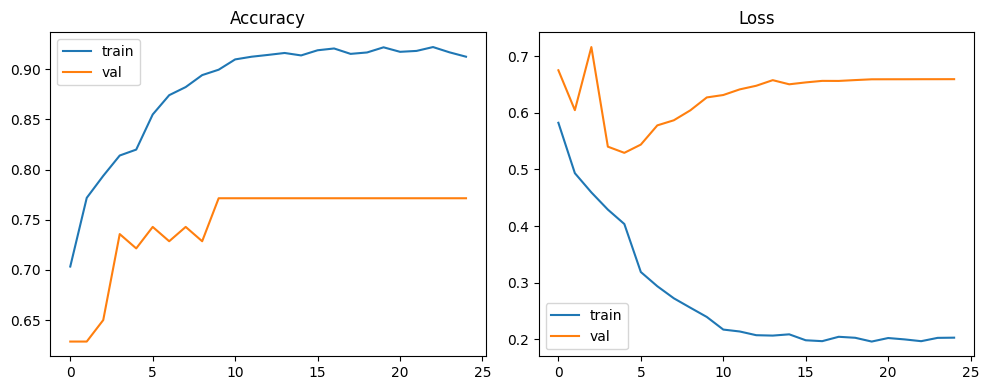

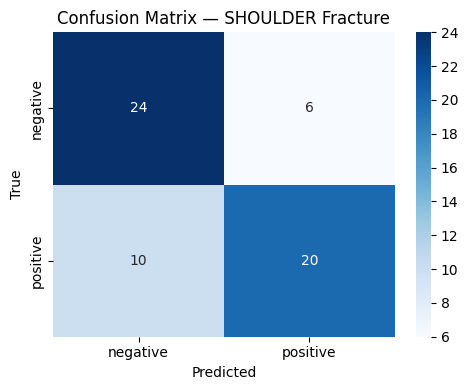


📋 Classification report:

              precision    recall  f1-score   support

    negative       0.71      0.80      0.75        30
    positive       0.77      0.67      0.71        30

    accuracy                           0.73        60
   macro avg       0.74      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



In [2]:
import os
import random
from collections import Counter

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# -------------------------
# Konfiguracja
# -------------------------
base_root = r"C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman"
category  = "SHOULDER"      # <-- TUTAJ zmieniasz: ELBOW / SHOULDER / HAND / FOREARM / FINGER
dataset_path = os.path.join(base_root, f"XR_{category}_classification")

image_size   = 224
batch_size   = 16
num_workers  = 2
epochs       = 25
lr           = 1e-4
seed         = 27

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("🔹 Device:", device)
print("📂 Dataset path:", dataset_path)

# -------------------------
# Seed
# -------------------------
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

# -------------------------
# Transformacje
# -------------------------
data_transforms = {
    "train": transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    "val": transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    "test": transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
}

# -------------------------
# Datasets i Dataloaders
# -------------------------
splits = ["train", "val", "test"]

image_datasets = {
    split: datasets.ImageFolder(os.path.join(dataset_path, split),
                                transform=data_transforms[split])
    for split in splits
}

dataloaders = {
    split: DataLoader(image_datasets[split],
                      batch_size=batch_size,
                      shuffle=(split == "train"),
                      num_workers=num_workers)
    for split in splits
}

class_names = image_datasets["train"].classes
print("🏷️ Klasy:", class_names)
for split in splits:
    print(f"{split:>5}: {len(image_datasets[split])} obrazów")

# -------------------------
# Rozkład klas (kontrola)
# -------------------------
for split in splits:
    cnt = Counter([label for _, label in image_datasets[split]])
    print(f"{split} distribution:", cnt)
print("───────────────────────────────")

# -------------------------
# Model VGG16 (transfer learning)
# -------------------------
model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)

# Zamrażamy cechy (możesz odblokować później dla lepszego wyniku)
for param in model.features[:20].parameters():   # zamroź tylko do ~połowy
    param.requires_grad = False


# Zmieniamy ostatnią warstwę klasyfikatora
in_features = model.classifier[-1].in_features
model.classifier[-1] = nn.Linear(in_features, len(class_names))
model = model.to(device)

# Wagi klas (opcjonalnie, przy lekkiej nierównowadze)
train_labels = [label for _, label in image_datasets["train"]]
counts = Counter(train_labels)
total = sum(counts.values())
class_weights = torch.tensor(
    [total / counts[i] for i in range(len(class_names))],
    dtype=torch.float32
).to(device)
print("⚖️ Wagi klas:", class_weights.tolist())

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.AdamW(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# -------------------------
# Pętle trening / walidacja / test
# -------------------------
history = {
    "train_acc": [], "train_loss": [],
    "val_acc":   [], "val_loss":   [],
    "test_acc":  [], "test_loss":  [],
}

for epoch in range(1, epochs + 1):
    print(f"\n🔹 Epoch {epoch}/{epochs}")

    # ---- TRAIN ----
    model.train()
    run_loss, correct, total = 0.0, 0, 0
    for inputs, labels in tqdm(dataloaders["train"], desc="Train", leave=False):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        run_loss += loss.item() * inputs.size(0)
        correct += torch.sum(preds == labels).item()
        total += labels.size(0)

    train_loss = run_loss / total
    train_acc = correct / total

    # ---- VAL ----
    model.eval()
    run_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in tqdm(dataloaders["val"], desc="Val", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            run_loss += loss.item() * inputs.size(0)
            correct += torch.sum(preds == labels).item()
            total += labels.size(0)

    val_loss = run_loss / total
    val_acc = correct / total

    # ---- TEST (monitoring w trakcie) ----
    run_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in tqdm(dataloaders["test"], desc="Test", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            run_loss += loss.item() * inputs.size(0)
            correct += torch.sum(preds == labels).item()
            total += labels.size(0)

    test_loss = run_loss / total
    test_acc = correct / total

    scheduler.step()

    history["train_acc"].append(train_acc)
    history["train_loss"].append(train_loss)
    history["val_acc"].append(val_acc)
    history["val_loss"].append(val_loss)
    history["test_acc"].append(test_acc)
    history["test_loss"].append(test_loss)

    print(f"✅ Train: acc={train_acc:.3f}, loss={train_loss:.3f} | "
          f"Val: acc={val_acc:.3f}, loss={val_loss:.3f} | "
          f"Test: acc={test_acc:.3f}, loss={test_loss:.3f}")

# -------------------------
# Wykresy
# -------------------------
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history["train_acc"], label="train")
plt.plot(history["val_acc"], label="val")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history["train_loss"], label="train")
plt.plot(history["val_loss"], label="val")
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------
# Końcowy TEST + Confusion Matrix
# -------------------------
y_true, y_pred = [], []
model.eval()
with torch.no_grad():
    for inputs, labels in dataloaders["test"]:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix — {category} Fracture")
plt.tight_layout()
plt.show()

print("\n📋 Classification report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


In [3]:
import os
import random
import shutil
from glob import glob

# >>> USTAW SWOJĄ ŚCIEŻKĘ <<<
dataset_path = r"C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_HAND_classification"

# Ustawienia
seed = 42
test_fraction = 0.30       # jaka część z VAL idzie do TEST
source_split = "val"       # z czego tworzymy TEST: "val" (zalecane) lub "train"
move_files = True          # True = przenieś (bez duplikatów); False = kopiuj

random.seed(seed)

# Struktura
splits = ["train", "val", "test"]
classes = ["positive", "negative"]
for split in splits:
    for cls in classes:
        os.makedirs(os.path.join(dataset_path, split, cls), exist_ok=True)

def pick_files(dirpath):
    exts = ("*.jpg", "*.jpeg", "*.png")
    files = []
    for e in exts:
        files.extend(glob(os.path.join(dirpath, e)))
    return files

moved_total = 0
report = []

for cls in classes:
    src_dir = os.path.join(dataset_path, source_split, cls)
    dst_dir = os.path.join(dataset_path, "test", cls)

    files = pick_files(src_dir)
    n_src = len(files)
    if n_src == 0:
        report.append(f"[{cls}] Brak plików w {src_dir} — pomijam.")
        continue

    n_take = max(1, int(round(n_src * test_fraction))) if n_src > 3 else 1
    sample = random.sample(files, n_take)

    for f in sample:
        if move_files:
            shutil.move(f, os.path.join(dst_dir, os.path.basename(f)))
        else:
            shutil.copy2(f, os.path.join(dst_dir, os.path.basename(f)))
    moved_total += len(sample)

    # Podsumowanie
    n_src_after = len(pick_files(src_dir))
    n_test_now = len(pick_files(dst_dir))
    report.append(
        f"[{cls}] przeniesiono {len(sample)} z {n_src} → "
        f"{source_split} zostało {n_src_after}, test ma teraz {n_test_now}"
    )

print("\n=== PODSUMOWANIE ===")
for line in report:
    print(line)
print(f"\n✓ Razem przeniesionych do TEST: {moved_total}")

print("\nŚcieżki:")
print(f"train: {os.path.join(dataset_path, 'train')}")
print(f"val  : {os.path.join(dataset_path, 'val')}")
print(f"test : {os.path.join(dataset_path, 'test')}")




=== PODSUMOWANIE ===
[positive] przeniesiono 30 z 100 → val zostało 70, test ma teraz 30
[negative] przeniesiono 30 z 100 → val zostało 70, test ma teraz 30

✓ Razem przeniesionych do TEST: 60

Ścieżki:
train: C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_HAND_classification\train
val  : C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_HAND_classification\val
test : C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_HAND_classification\test


🔹 Device: cuda
📂 Dataset path: C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_HAND_classification
🏷️ Klasy: ['negative', 'positive']
train: 5137 obrazów
  val: 140 obrazów
 test: 60 obrazów
train distribution: Counter({0: 3839, 1: 1298})
val distribution: Counter({0: 70, 1: 70})
test distribution: Counter({0: 30, 1: 30})
───────────────────────────────
⚖️ Wagi klas: [1.3381088972091675, 3.957627058029175]

🔹 Epoch 1/25


✅ Train: acc=0.628, loss=0.672 | Val: acc=0.657, loss=0.604 | Test: acc=0.750, loss=0.576

🔹 Epoch 2/25


✅ Train: acc=0.701, loss=0.634 | Val: acc=0.614, loss=0.667 | Test: acc=0.650, loss=0.625

🔹 Epoch 3/25


✅ Train: acc=0.738, loss=0.577 | Val: acc=0.714, loss=0.590 | Test: acc=0.767, loss=0.571

🔹 Epoch 4/25


✅ Train: acc=0.746, loss=0.552 | Val: acc=0.664, loss=0.602 | Test: acc=0.683, loss=0.628

🔹 Epoch 5/25


✅ Train: acc=0.763, loss=0.526 | Val: acc=0.729, loss=0.524 | Test: acc=0.767, loss=0.564

🔹 Epoch 6/25


✅ Train: acc=0.825, loss=0.446 | Val: acc=0.729, loss=0.528 | Test: acc=0.767, loss=0.590

🔹 Epoch 7/25


✅ Train: acc=0.833, loss=0.426 | Val: acc=0.729, loss=0.537 | Test: acc=0.783, loss=0.582

🔹 Epoch 8/25


✅ Train: acc=0.842, loss=0.398 | Val: acc=0.729, loss=0.553 | Test: acc=0.783, loss=0.568

🔹 Epoch 9/25


✅ Train: acc=0.856, loss=0.377 | Val: acc=0.721, loss=0.616 | Test: acc=0.800, loss=0.577

🔹 Epoch 10/25


✅ Train: acc=0.854, loss=0.372 | Val: acc=0.721, loss=0.590 | Test: acc=0.783, loss=0.583

🔹 Epoch 11/25


✅ Train: acc=0.855, loss=0.351 | Val: acc=0.729, loss=0.599 | Test: acc=0.800, loss=0.578

🔹 Epoch 12/25


✅ Train: acc=0.867, loss=0.349 | Val: acc=0.721, loss=0.602 | Test: acc=0.817, loss=0.576

🔹 Epoch 13/25


✅ Train: acc=0.861, loss=0.345 | Val: acc=0.729, loss=0.609 | Test: acc=0.817, loss=0.574

🔹 Epoch 14/25


✅ Train: acc=0.864, loss=0.343 | Val: acc=0.729, loss=0.611 | Test: acc=0.817, loss=0.572

🔹 Epoch 15/25


✅ Train: acc=0.862, loss=0.341 | Val: acc=0.729, loss=0.615 | Test: acc=0.817, loss=0.572

🔹 Epoch 16/25


✅ Train: acc=0.868, loss=0.336 | Val: acc=0.729, loss=0.616 | Test: acc=0.817, loss=0.572

🔹 Epoch 17/25


✅ Train: acc=0.866, loss=0.340 | Val: acc=0.729, loss=0.614 | Test: acc=0.817, loss=0.571

🔹 Epoch 18/25


✅ Train: acc=0.868, loss=0.335 | Val: acc=0.729, loss=0.614 | Test: acc=0.817, loss=0.571

🔹 Epoch 19/25


✅ Train: acc=0.864, loss=0.339 | Val: acc=0.729, loss=0.614 | Test: acc=0.817, loss=0.571

🔹 Epoch 20/25


✅ Train: acc=0.862, loss=0.342 | Val: acc=0.729, loss=0.614 | Test: acc=0.817, loss=0.571

🔹 Epoch 21/25


✅ Train: acc=0.862, loss=0.348 | Val: acc=0.729, loss=0.614 | Test: acc=0.817, loss=0.571

🔹 Epoch 22/25


✅ Train: acc=0.861, loss=0.339 | Val: acc=0.729, loss=0.614 | Test: acc=0.817, loss=0.571

🔹 Epoch 23/25


✅ Train: acc=0.865, loss=0.341 | Val: acc=0.729, loss=0.614 | Test: acc=0.817, loss=0.571

🔹 Epoch 24/25


✅ Train: acc=0.869, loss=0.335 | Val: acc=0.729, loss=0.614 | Test: acc=0.817, loss=0.571

🔹 Epoch 25/25


✅ Train: acc=0.860, loss=0.338 | Val: acc=0.729, loss=0.614 | Test: acc=0.817, loss=0.571


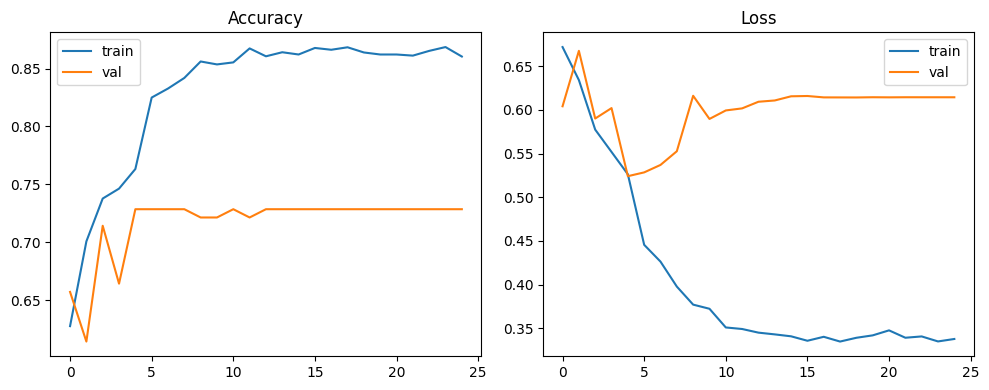

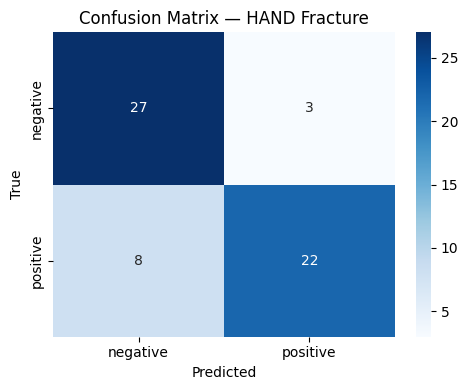


📋 Classification report:

              precision    recall  f1-score   support

    negative       0.77      0.90      0.83        30
    positive       0.88      0.73      0.80        30

    accuracy                           0.82        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.83      0.82      0.82        60



In [4]:
import os
import random
from collections import Counter

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# -------------------------
# Konfiguracja
# -------------------------
base_root = r"C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman"
category  = "HAND"      # <-- TUTAJ zmieniasz: ELBOW / SHOULDER / HAND / FOREARM / FINGER
dataset_path = os.path.join(base_root, f"XR_{category}_classification")

image_size   = 224
batch_size   = 16
num_workers  = 2
epochs       = 25
lr           = 1e-4
seed         = 27

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("🔹 Device:", device)
print("📂 Dataset path:", dataset_path)

# -------------------------
# Seed
# -------------------------
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

# -------------------------
# Transformacje
# -------------------------
data_transforms = {
    "train": transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    "val": transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    "test": transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
}

# -------------------------
# Datasets i Dataloaders
# -------------------------
splits = ["train", "val", "test"]

image_datasets = {
    split: datasets.ImageFolder(os.path.join(dataset_path, split),
                                transform=data_transforms[split])
    for split in splits
}

dataloaders = {
    split: DataLoader(image_datasets[split],
                      batch_size=batch_size,
                      shuffle=(split == "train"),
                      num_workers=num_workers)
    for split in splits
}

class_names = image_datasets["train"].classes
print("🏷️ Klasy:", class_names)
for split in splits:
    print(f"{split:>5}: {len(image_datasets[split])} obrazów")

# -------------------------
# Rozkład klas (kontrola)
# -------------------------
for split in splits:
    cnt = Counter([label for _, label in image_datasets[split]])
    print(f"{split} distribution:", cnt)
print("───────────────────────────────")

# -------------------------
# Model VGG16 (transfer learning)
# -------------------------
model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)

# Zamrażamy cechy (możesz odblokować później dla lepszego wyniku)
for param in model.features[:20].parameters():   # zamroź tylko do ~połowy
    param.requires_grad = False


# Zmieniamy ostatnią warstwę klasyfikatora
in_features = model.classifier[-1].in_features
model.classifier[-1] = nn.Linear(in_features, len(class_names))
model = model.to(device)

# Wagi klas (opcjonalnie, przy lekkiej nierównowadze)
train_labels = [label for _, label in image_datasets["train"]]
counts = Counter(train_labels)
total = sum(counts.values())
class_weights = torch.tensor(
    [total / counts[i] for i in range(len(class_names))],
    dtype=torch.float32
).to(device)
print("⚖️ Wagi klas:", class_weights.tolist())

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.AdamW(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# -------------------------
# Pętle trening / walidacja / test
# -------------------------
history = {
    "train_acc": [], "train_loss": [],
    "val_acc":   [], "val_loss":   [],
    "test_acc":  [], "test_loss":  [],
}

for epoch in range(1, epochs + 1):
    print(f"\n🔹 Epoch {epoch}/{epochs}")

    # ---- TRAIN ----
    model.train()
    run_loss, correct, total = 0.0, 0, 0
    for inputs, labels in tqdm(dataloaders["train"], desc="Train", leave=False):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        run_loss += loss.item() * inputs.size(0)
        correct += torch.sum(preds == labels).item()
        total += labels.size(0)

    train_loss = run_loss / total
    train_acc = correct / total

    # ---- VAL ----
    model.eval()
    run_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in tqdm(dataloaders["val"], desc="Val", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            run_loss += loss.item() * inputs.size(0)
            correct += torch.sum(preds == labels).item()
            total += labels.size(0)

    val_loss = run_loss / total
    val_acc = correct / total

    # ---- TEST (monitoring w trakcie) ----
    run_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in tqdm(dataloaders["test"], desc="Test", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            run_loss += loss.item() * inputs.size(0)
            correct += torch.sum(preds == labels).item()
            total += labels.size(0)

    test_loss = run_loss / total
    test_acc = correct / total

    scheduler.step()

    history["train_acc"].append(train_acc)
    history["train_loss"].append(train_loss)
    history["val_acc"].append(val_acc)
    history["val_loss"].append(val_loss)
    history["test_acc"].append(test_acc)
    history["test_loss"].append(test_loss)

    print(f"✅ Train: acc={train_acc:.3f}, loss={train_loss:.3f} | "
          f"Val: acc={val_acc:.3f}, loss={val_loss:.3f} | "
          f"Test: acc={test_acc:.3f}, loss={test_loss:.3f}")

# -------------------------
# Wykresy
# -------------------------
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history["train_acc"], label="train")
plt.plot(history["val_acc"], label="val")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history["train_loss"], label="train")
plt.plot(history["val_loss"], label="val")
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------
# Końcowy TEST + Confusion Matrix
# -------------------------
y_true, y_pred = [], []
model.eval()
with torch.no_grad():
    for inputs, labels in dataloaders["test"]:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix — {category} Fracture")
plt.tight_layout()
plt.show()

print("\n📋 Classification report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


In [5]:
import os
import random
import shutil
from glob import glob

# >>> USTAW SWOJĄ ŚCIEŻKĘ <<<
dataset_path = r"C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_FINGER_classification"

# Ustawienia
seed = 42
test_fraction = 0.30       # jaka część z VAL idzie do TEST
source_split = "val"       # z czego tworzymy TEST: "val" (zalecane) lub "train"
move_files = True          # True = przenieś (bez duplikatów); False = kopiuj

random.seed(seed)

# Struktura
splits = ["train", "val", "test"]
classes = ["positive", "negative"]
for split in splits:
    for cls in classes:
        os.makedirs(os.path.join(dataset_path, split, cls), exist_ok=True)

def pick_files(dirpath):
    exts = ("*.jpg", "*.jpeg", "*.png")
    files = []
    for e in exts:
        files.extend(glob(os.path.join(dirpath, e)))
    return files

moved_total = 0
report = []

for cls in classes:
    src_dir = os.path.join(dataset_path, source_split, cls)
    dst_dir = os.path.join(dataset_path, "test", cls)

    files = pick_files(src_dir)
    n_src = len(files)
    if n_src == 0:
        report.append(f"[{cls}] Brak plików w {src_dir} — pomijam.")
        continue

    n_take = max(1, int(round(n_src * test_fraction))) if n_src > 3 else 1
    sample = random.sample(files, n_take)

    for f in sample:
        if move_files:
            shutil.move(f, os.path.join(dst_dir, os.path.basename(f)))
        else:
            shutil.copy2(f, os.path.join(dst_dir, os.path.basename(f)))
    moved_total += len(sample)

    # Podsumowanie
    n_src_after = len(pick_files(src_dir))
    n_test_now = len(pick_files(dst_dir))
    report.append(
        f"[{cls}] przeniesiono {len(sample)} z {n_src} → "
        f"{source_split} zostało {n_src_after}, test ma teraz {n_test_now}"
    )

print("\n=== PODSUMOWANIE ===")
for line in report:
    print(line)
print(f"\n✓ Razem przeniesionych do TEST: {moved_total}")

print("\nŚcieżki:")
print(f"train: {os.path.join(dataset_path, 'train')}")
print(f"val  : {os.path.join(dataset_path, 'val')}")
print(f"test : {os.path.join(dataset_path, 'test')}")




=== PODSUMOWANIE ===
[positive] przeniesiono 30 z 100 → val zostało 70, test ma teraz 30
[negative] przeniesiono 30 z 100 → val zostało 70, test ma teraz 30

✓ Razem przeniesionych do TEST: 60

Ścieżki:
train: C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_FINGER_classification\train
val  : C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_FINGER_classification\val
test : C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_FINGER_classification\test


🔹 Device: cuda
📂 Dataset path: C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_FINGER_classification
🏷️ Klasy: ['negative', 'positive']
train: 4704 obrazów
  val: 140 obrazów
 test: 60 obrazów
train distribution: Counter({0: 2930, 1: 1774})
val distribution: Counter({0: 70, 1: 70})
test distribution: Counter({0: 30, 1: 30})
───────────────────────────────
⚖️ Wagi klas: [1.6054607629776, 2.651634693145752]

🔹 Epoch 1/25


✅ Train: acc=0.707, loss=0.559 | Val: acc=0.707, loss=0.561 | Test: acc=0.783, loss=0.466

🔹 Epoch 2/25


✅ Train: acc=0.773, loss=0.482 | Val: acc=0.743, loss=0.565 | Test: acc=0.733, loss=0.517

🔹 Epoch 3/25


✅ Train: acc=0.793, loss=0.448 | Val: acc=0.750, loss=0.532 | Test: acc=0.817, loss=0.446

🔹 Epoch 4/25


✅ Train: acc=0.822, loss=0.410 | Val: acc=0.771, loss=0.489 | Test: acc=0.817, loss=0.465

🔹 Epoch 5/25


✅ Train: acc=0.839, loss=0.369 | Val: acc=0.764, loss=0.490 | Test: acc=0.817, loss=0.462

🔹 Epoch 6/25


✅ Train: acc=0.880, loss=0.291 | Val: acc=0.757, loss=0.516 | Test: acc=0.817, loss=0.518

🔹 Epoch 7/25


✅ Train: acc=0.901, loss=0.254 | Val: acc=0.786, loss=0.532 | Test: acc=0.817, loss=0.507

🔹 Epoch 8/25


✅ Train: acc=0.908, loss=0.233 | Val: acc=0.800, loss=0.525 | Test: acc=0.850, loss=0.527

🔹 Epoch 9/25


✅ Train: acc=0.916, loss=0.207 | Val: acc=0.786, loss=0.539 | Test: acc=0.833, loss=0.557

🔹 Epoch 10/25


✅ Train: acc=0.932, loss=0.186 | Val: acc=0.800, loss=0.571 | Test: acc=0.817, loss=0.660

🔹 Epoch 11/25


✅ Train: acc=0.939, loss=0.163 | Val: acc=0.800, loss=0.579 | Test: acc=0.833, loss=0.644

🔹 Epoch 12/25


✅ Train: acc=0.940, loss=0.159 | Val: acc=0.779, loss=0.587 | Test: acc=0.833, loss=0.643

🔹 Epoch 13/25


✅ Train: acc=0.940, loss=0.157 | Val: acc=0.793, loss=0.580 | Test: acc=0.833, loss=0.640

🔹 Epoch 14/25


✅ Train: acc=0.943, loss=0.153 | Val: acc=0.786, loss=0.589 | Test: acc=0.833, loss=0.646

🔹 Epoch 15/25


✅ Train: acc=0.945, loss=0.145 | Val: acc=0.786, loss=0.599 | Test: acc=0.833, loss=0.659

🔹 Epoch 16/25


✅ Train: acc=0.943, loss=0.148 | Val: acc=0.786, loss=0.599 | Test: acc=0.833, loss=0.658

🔹 Epoch 17/25


✅ Train: acc=0.942, loss=0.157 | Val: acc=0.786, loss=0.598 | Test: acc=0.833, loss=0.654

🔹 Epoch 18/25


✅ Train: acc=0.942, loss=0.151 | Val: acc=0.786, loss=0.598 | Test: acc=0.833, loss=0.652

🔹 Epoch 19/25


✅ Train: acc=0.946, loss=0.146 | Val: acc=0.786, loss=0.600 | Test: acc=0.833, loss=0.655

🔹 Epoch 20/25


✅ Train: acc=0.948, loss=0.148 | Val: acc=0.786, loss=0.601 | Test: acc=0.833, loss=0.655

🔹 Epoch 21/25


✅ Train: acc=0.941, loss=0.154 | Val: acc=0.786, loss=0.601 | Test: acc=0.833, loss=0.655

🔹 Epoch 22/25


✅ Train: acc=0.941, loss=0.156 | Val: acc=0.786, loss=0.601 | Test: acc=0.833, loss=0.655

🔹 Epoch 23/25


✅ Train: acc=0.944, loss=0.150 | Val: acc=0.786, loss=0.601 | Test: acc=0.833, loss=0.655

🔹 Epoch 24/25


✅ Train: acc=0.947, loss=0.146 | Val: acc=0.786, loss=0.601 | Test: acc=0.833, loss=0.655

🔹 Epoch 25/25


✅ Train: acc=0.942, loss=0.153 | Val: acc=0.786, loss=0.601 | Test: acc=0.833, loss=0.655


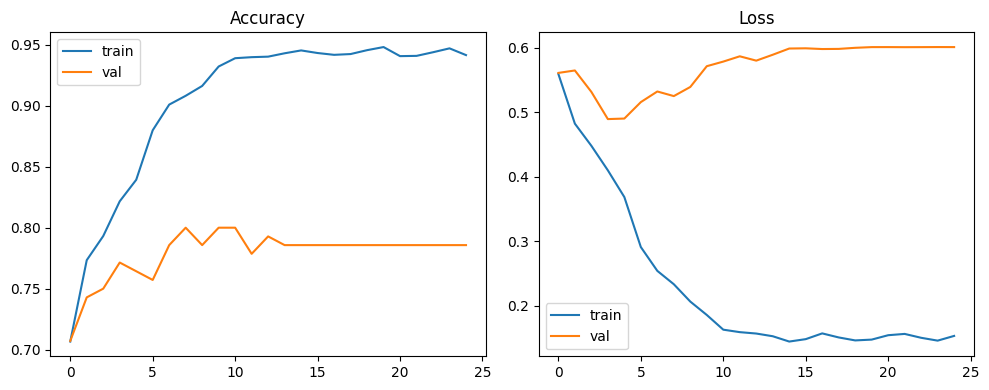

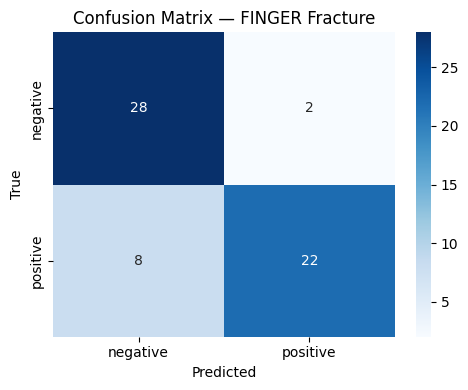


📋 Classification report:

              precision    recall  f1-score   support

    negative       0.78      0.93      0.85        30
    positive       0.92      0.73      0.81        30

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60



In [6]:
import os
import random
from collections import Counter

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# -------------------------
# Konfiguracja
# -------------------------
base_root = r"C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman"
category  = "FINGER"      # <-- TUTAJ zmieniasz: ELBOW / SHOULDER / HAND / FOREARM / FINGER
dataset_path = os.path.join(base_root, f"XR_{category}_classification")

image_size   = 224
batch_size   = 16
num_workers  = 2
epochs       = 25
lr           = 1e-4
seed         = 27

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("🔹 Device:", device)
print("📂 Dataset path:", dataset_path)

# -------------------------
# Seed
# -------------------------
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

# -------------------------
# Transformacje
# -------------------------
data_transforms = {
    "train": transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    "val": transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    "test": transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
}

# -------------------------
# Datasets i Dataloaders
# -------------------------
splits = ["train", "val", "test"]

image_datasets = {
    split: datasets.ImageFolder(os.path.join(dataset_path, split),
                                transform=data_transforms[split])
    for split in splits
}

dataloaders = {
    split: DataLoader(image_datasets[split],
                      batch_size=batch_size,
                      shuffle=(split == "train"),
                      num_workers=num_workers)
    for split in splits
}

class_names = image_datasets["train"].classes
print("🏷️ Klasy:", class_names)
for split in splits:
    print(f"{split:>5}: {len(image_datasets[split])} obrazów")

# -------------------------
# Rozkład klas (kontrola)
# -------------------------
for split in splits:
    cnt = Counter([label for _, label in image_datasets[split]])
    print(f"{split} distribution:", cnt)
print("───────────────────────────────")

# -------------------------
# Model VGG16 (transfer learning)
# -------------------------
model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)

# Zamrażamy cechy (możesz odblokować później dla lepszego wyniku)
for param in model.features[:20].parameters():   # zamroź tylko do ~połowy
    param.requires_grad = False


# Zmieniamy ostatnią warstwę klasyfikatora
in_features = model.classifier[-1].in_features
model.classifier[-1] = nn.Linear(in_features, len(class_names))
model = model.to(device)

# Wagi klas (opcjonalnie, przy lekkiej nierównowadze)
train_labels = [label for _, label in image_datasets["train"]]
counts = Counter(train_labels)
total = sum(counts.values())
class_weights = torch.tensor(
    [total / counts[i] for i in range(len(class_names))],
    dtype=torch.float32
).to(device)
print("⚖️ Wagi klas:", class_weights.tolist())

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.AdamW(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# -------------------------
# Pętle trening / walidacja / test
# -------------------------
history = {
    "train_acc": [], "train_loss": [],
    "val_acc":   [], "val_loss":   [],
    "test_acc":  [], "test_loss":  [],
}

for epoch in range(1, epochs + 1):
    print(f"\n🔹 Epoch {epoch}/{epochs}")

    # ---- TRAIN ----
    model.train()
    run_loss, correct, total = 0.0, 0, 0
    for inputs, labels in tqdm(dataloaders["train"], desc="Train", leave=False):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        run_loss += loss.item() * inputs.size(0)
        correct += torch.sum(preds == labels).item()
        total += labels.size(0)

    train_loss = run_loss / total
    train_acc = correct / total

    # ---- VAL ----
    model.eval()
    run_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in tqdm(dataloaders["val"], desc="Val", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            run_loss += loss.item() * inputs.size(0)
            correct += torch.sum(preds == labels).item()
            total += labels.size(0)

    val_loss = run_loss / total
    val_acc = correct / total

    # ---- TEST (monitoring w trakcie) ----
    run_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in tqdm(dataloaders["test"], desc="Test", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            run_loss += loss.item() * inputs.size(0)
            correct += torch.sum(preds == labels).item()
            total += labels.size(0)

    test_loss = run_loss / total
    test_acc = correct / total

    scheduler.step()

    history["train_acc"].append(train_acc)
    history["train_loss"].append(train_loss)
    history["val_acc"].append(val_acc)
    history["val_loss"].append(val_loss)
    history["test_acc"].append(test_acc)
    history["test_loss"].append(test_loss)

    print(f"✅ Train: acc={train_acc:.3f}, loss={train_loss:.3f} | "
          f"Val: acc={val_acc:.3f}, loss={val_loss:.3f} | "
          f"Test: acc={test_acc:.3f}, loss={test_loss:.3f}")

# -------------------------
# Wykresy
# -------------------------
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history["train_acc"], label="train")
plt.plot(history["val_acc"], label="val")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history["train_loss"], label="train")
plt.plot(history["val_loss"], label="val")
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------
# Końcowy TEST + Confusion Matrix
# -------------------------
y_true, y_pred = [], []
model.eval()
with torch.no_grad():
    for inputs, labels in dataloaders["test"]:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix — {category} Fracture")
plt.tight_layout()
plt.show()

print("\n📋 Classification report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


In [7]:
import os
import random
import shutil
from glob import glob

# >>> USTAW SWOJĄ ŚCIEŻKĘ <<<
dataset_path = r"C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_FOREARM_classification"

# Ustawienia
seed = 42
test_fraction = 0.30       # jaka część z VAL idzie do TEST
source_split = "val"       # z czego tworzymy TEST: "val" (zalecane) lub "train"
move_files = True          # True = przenieś (bez duplikatów); False = kopiuj

random.seed(seed)

# Struktura
splits = ["train", "val", "test"]
classes = ["positive", "negative"]
for split in splits:
    for cls in classes:
        os.makedirs(os.path.join(dataset_path, split, cls), exist_ok=True)

def pick_files(dirpath):
    exts = ("*.jpg", "*.jpeg", "*.png")
    files = []
    for e in exts:
        files.extend(glob(os.path.join(dirpath, e)))
    return files

moved_total = 0
report = []

for cls in classes:
    src_dir = os.path.join(dataset_path, source_split, cls)
    dst_dir = os.path.join(dataset_path, "test", cls)

    files = pick_files(src_dir)
    n_src = len(files)
    if n_src == 0:
        report.append(f"[{cls}] Brak plików w {src_dir} — pomijam.")
        continue

    n_take = max(1, int(round(n_src * test_fraction))) if n_src > 3 else 1
    sample = random.sample(files, n_take)

    for f in sample:
        if move_files:
            shutil.move(f, os.path.join(dst_dir, os.path.basename(f)))
        else:
            shutil.copy2(f, os.path.join(dst_dir, os.path.basename(f)))
    moved_total += len(sample)

    # Podsumowanie
    n_src_after = len(pick_files(src_dir))
    n_test_now = len(pick_files(dst_dir))
    report.append(
        f"[{cls}] przeniesiono {len(sample)} z {n_src} → "
        f"{source_split} zostało {n_src_after}, test ma teraz {n_test_now}"
    )

print("\n=== PODSUMOWANIE ===")
for line in report:
    print(line)
print(f"\n✓ Razem przeniesionych do TEST: {moved_total}")

print("\nŚcieżki:")
print(f"train: {os.path.join(dataset_path, 'train')}")
print(f"val  : {os.path.join(dataset_path, 'val')}")
print(f"test : {os.path.join(dataset_path, 'test')}")




=== PODSUMOWANIE ===
[positive] przeniesiono 30 z 100 → val zostało 70, test ma teraz 30
[negative] przeniesiono 30 z 100 → val zostało 70, test ma teraz 30

✓ Razem przeniesionych do TEST: 60

Ścieżki:
train: C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_FOREARM_classification\train
val  : C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_FOREARM_classification\val
test : C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_FOREARM_classification\test


🔹 Device: cuda
📂 Dataset path: C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman\XR_FOREARM_classification
🏷️ Klasy: ['negative', 'positive']
train: 1600 obrazów
  val: 140 obrazów
 test: 60 obrazów
train distribution: Counter({0: 1056, 1: 544})
val distribution: Counter({0: 70, 1: 70})
test distribution: Counter({0: 30, 1: 30})
───────────────────────────────
⚖️ Wagi klas: [1.5151515007019043, 2.941176414489746]

🔹 Epoch 1/25


✅ Train: acc=0.719, loss=0.583 | Val: acc=0.743, loss=0.549 | Test: acc=0.733, loss=0.578

🔹 Epoch 2/25


✅ Train: acc=0.819, loss=0.472 | Val: acc=0.821, loss=0.467 | Test: acc=0.800, loss=0.522

🔹 Epoch 3/25


✅ Train: acc=0.867, loss=0.392 | Val: acc=0.821, loss=0.484 | Test: acc=0.817, loss=0.486

🔹 Epoch 4/25


✅ Train: acc=0.879, loss=0.330 | Val: acc=0.807, loss=0.480 | Test: acc=0.800, loss=0.700

🔹 Epoch 5/25


✅ Train: acc=0.886, loss=0.298 | Val: acc=0.779, loss=0.817 | Test: acc=0.817, loss=0.721

🔹 Epoch 6/25


✅ Train: acc=0.911, loss=0.229 | Val: acc=0.807, loss=0.655 | Test: acc=0.817, loss=0.664

🔹 Epoch 7/25


✅ Train: acc=0.928, loss=0.180 | Val: acc=0.829, loss=0.686 | Test: acc=0.800, loss=0.734

🔹 Epoch 8/25


✅ Train: acc=0.939, loss=0.164 | Val: acc=0.829, loss=0.699 | Test: acc=0.783, loss=0.714

🔹 Epoch 9/25


✅ Train: acc=0.944, loss=0.149 | Val: acc=0.821, loss=0.834 | Test: acc=0.800, loss=0.779

🔹 Epoch 10/25


✅ Train: acc=0.946, loss=0.140 | Val: acc=0.814, loss=0.777 | Test: acc=0.783, loss=0.784

🔹 Epoch 11/25


✅ Train: acc=0.961, loss=0.123 | Val: acc=0.814, loss=0.763 | Test: acc=0.767, loss=0.781

🔹 Epoch 12/25


✅ Train: acc=0.961, loss=0.118 | Val: acc=0.821, loss=0.795 | Test: acc=0.783, loss=0.801

🔹 Epoch 13/25


✅ Train: acc=0.954, loss=0.121 | Val: acc=0.821, loss=0.792 | Test: acc=0.783, loss=0.805

🔹 Epoch 14/25


✅ Train: acc=0.968, loss=0.099 | Val: acc=0.814, loss=0.823 | Test: acc=0.783, loss=0.823

🔹 Epoch 15/25


✅ Train: acc=0.963, loss=0.109 | Val: acc=0.821, loss=0.856 | Test: acc=0.783, loss=0.844

🔹 Epoch 16/25


✅ Train: acc=0.960, loss=0.114 | Val: acc=0.821, loss=0.858 | Test: acc=0.783, loss=0.845

🔹 Epoch 17/25


✅ Train: acc=0.966, loss=0.110 | Val: acc=0.821, loss=0.856 | Test: acc=0.783, loss=0.845

🔹 Epoch 18/25


✅ Train: acc=0.958, loss=0.101 | Val: acc=0.821, loss=0.858 | Test: acc=0.783, loss=0.846

🔹 Epoch 19/25


✅ Train: acc=0.963, loss=0.105 | Val: acc=0.821, loss=0.858 | Test: acc=0.783, loss=0.846

🔹 Epoch 20/25


✅ Train: acc=0.964, loss=0.110 | Val: acc=0.821, loss=0.855 | Test: acc=0.783, loss=0.846

🔹 Epoch 21/25


✅ Train: acc=0.971, loss=0.100 | Val: acc=0.821, loss=0.855 | Test: acc=0.783, loss=0.846

🔹 Epoch 22/25


✅ Train: acc=0.964, loss=0.117 | Val: acc=0.821, loss=0.855 | Test: acc=0.783, loss=0.846

🔹 Epoch 23/25


✅ Train: acc=0.963, loss=0.112 | Val: acc=0.821, loss=0.855 | Test: acc=0.783, loss=0.846

🔹 Epoch 24/25


✅ Train: acc=0.959, loss=0.113 | Val: acc=0.821, loss=0.854 | Test: acc=0.783, loss=0.846

🔹 Epoch 25/25


✅ Train: acc=0.964, loss=0.113 | Val: acc=0.821, loss=0.855 | Test: acc=0.783, loss=0.846


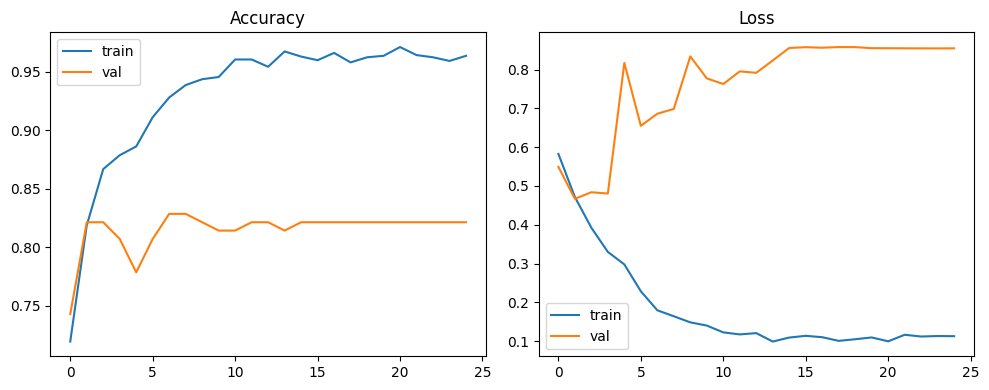

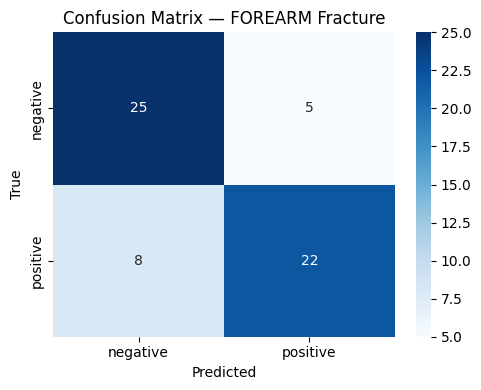


📋 Classification report:

              precision    recall  f1-score   support

    negative       0.76      0.83      0.79        30
    positive       0.81      0.73      0.77        30

    accuracy                           0.78        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.79      0.78      0.78        60



In [8]:
import os
import random
from collections import Counter

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# -------------------------
# Konfiguracja
# -------------------------
base_root = r"C:\Users\Weronika\Desktop\inzynierka\vgg16\klasyfikacja_zlaman"
category  = "FOREARM"      # <-- TUTAJ zmieniasz: ELBOW / SHOULDER / HAND / FOREARM / FINGER
dataset_path = os.path.join(base_root, f"XR_{category}_classification")

image_size   = 224
batch_size   = 16
num_workers  = 2
epochs       = 25
lr           = 1e-4
seed         = 27

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("🔹 Device:", device)
print("📂 Dataset path:", dataset_path)

# -------------------------
# Seed
# -------------------------
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

# -------------------------
# Transformacje
# -------------------------
data_transforms = {
    "train": transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    "val": transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    "test": transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
}

# -------------------------
# Datasets i Dataloaders
# -------------------------
splits = ["train", "val", "test"]

image_datasets = {
    split: datasets.ImageFolder(os.path.join(dataset_path, split),
                                transform=data_transforms[split])
    for split in splits
}

dataloaders = {
    split: DataLoader(image_datasets[split],
                      batch_size=batch_size,
                      shuffle=(split == "train"),
                      num_workers=num_workers)
    for split in splits
}

class_names = image_datasets["train"].classes
print("🏷️ Klasy:", class_names)
for split in splits:
    print(f"{split:>5}: {len(image_datasets[split])} obrazów")

# -------------------------
# Rozkład klas (kontrola)
# -------------------------
for split in splits:
    cnt = Counter([label for _, label in image_datasets[split]])
    print(f"{split} distribution:", cnt)
print("───────────────────────────────")

# -------------------------
# Model VGG16 (transfer learning)
# -------------------------
model = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)

# Zamrażamy cechy (możesz odblokować później dla lepszego wyniku)
for param in model.features[:20].parameters():   # zamroź tylko do ~połowy
    param.requires_grad = False


# Zmieniamy ostatnią warstwę klasyfikatora
in_features = model.classifier[-1].in_features
model.classifier[-1] = nn.Linear(in_features, len(class_names))
model = model.to(device)

# Wagi klas (opcjonalnie, przy lekkiej nierównowadze)
train_labels = [label for _, label in image_datasets["train"]]
counts = Counter(train_labels)
total = sum(counts.values())
class_weights = torch.tensor(
    [total / counts[i] for i in range(len(class_names))],
    dtype=torch.float32
).to(device)
print("⚖️ Wagi klas:", class_weights.tolist())

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.AdamW(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# -------------------------
# Pętle trening / walidacja / test
# -------------------------
history = {
    "train_acc": [], "train_loss": [],
    "val_acc":   [], "val_loss":   [],
    "test_acc":  [], "test_loss":  [],
}

for epoch in range(1, epochs + 1):
    print(f"\n🔹 Epoch {epoch}/{epochs}")

    # ---- TRAIN ----
    model.train()
    run_loss, correct, total = 0.0, 0, 0
    for inputs, labels in tqdm(dataloaders["train"], desc="Train", leave=False):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        run_loss += loss.item() * inputs.size(0)
        correct += torch.sum(preds == labels).item()
        total += labels.size(0)

    train_loss = run_loss / total
    train_acc = correct / total

    # ---- VAL ----
    model.eval()
    run_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in tqdm(dataloaders["val"], desc="Val", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            run_loss += loss.item() * inputs.size(0)
            correct += torch.sum(preds == labels).item()
            total += labels.size(0)

    val_loss = run_loss / total
    val_acc = correct / total

    # ---- TEST (monitoring w trakcie) ----
    run_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in tqdm(dataloaders["test"], desc="Test", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            run_loss += loss.item() * inputs.size(0)
            correct += torch.sum(preds == labels).item()
            total += labels.size(0)

    test_loss = run_loss / total
    test_acc = correct / total

    scheduler.step()

    history["train_acc"].append(train_acc)
    history["train_loss"].append(train_loss)
    history["val_acc"].append(val_acc)
    history["val_loss"].append(val_loss)
    history["test_acc"].append(test_acc)
    history["test_loss"].append(test_loss)

    print(f"✅ Train: acc={train_acc:.3f}, loss={train_loss:.3f} | "
          f"Val: acc={val_acc:.3f}, loss={val_loss:.3f} | "
          f"Test: acc={test_acc:.3f}, loss={test_loss:.3f}")

# -------------------------
# Wykresy
# -------------------------
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history["train_acc"], label="train")
plt.plot(history["val_acc"], label="val")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history["train_loss"], label="train")
plt.plot(history["val_loss"], label="val")
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------
# Końcowy TEST + Confusion Matrix
# -------------------------
y_true, y_pred = [], []
model.eval()
with torch.no_grad():
    for inputs, labels in dataloaders["test"]:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix — {category} Fracture")
plt.tight_layout()
plt.show()

print("\n📋 Classification report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))
